<h1 style="text-align:center;">Hotel Reservation Project: End-to-End ML</h1>

<br>
<br>

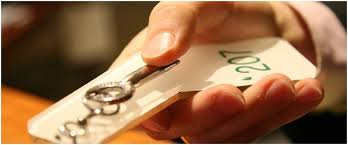


<br>
<br>


### Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image, display

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC


from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest,f_classif


set_config(transform_output='pandas', display='diagram')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

#### Reading The Data

In [128]:
data = pd.read_csv('../Hotel Reservation Dataset/data.csv')

In [129]:
for col in data.columns:
    if col == 'lead time' or col == 'date of reservation': continue
    print(col,data[col].unique())

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
number of adults [1 2 3 0 4]
number of children [ 1  0  2  3 10  9]
number of weekend nights [2 1 0 4 3 6 5 7]
number of week nights [ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
type of meal ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
car parking space [0 1]
room type ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market segment type ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
repeated [0 1]
P-C [ 0  3  1  2 11  4  5 13  6]
P-not-C [ 0  5  1  3  4 12 19  2 15 17  7 20 16 50 13  6 14 34 18  8 10 23 11 49
 47 53  9 33 22 24 52 21 48 28 39 25 31 38 26 51 42 37 35 56 44 27 32 55
 45 30 57 46 54 43 58 41 29 40 36]
average price  [ 88.   106.68  50.   ... 118.43 137.25 167.8 ]
special requests [0 1 3 2 4 5]
booking status ['Not_Canceled' 'Canceled']


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [131]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


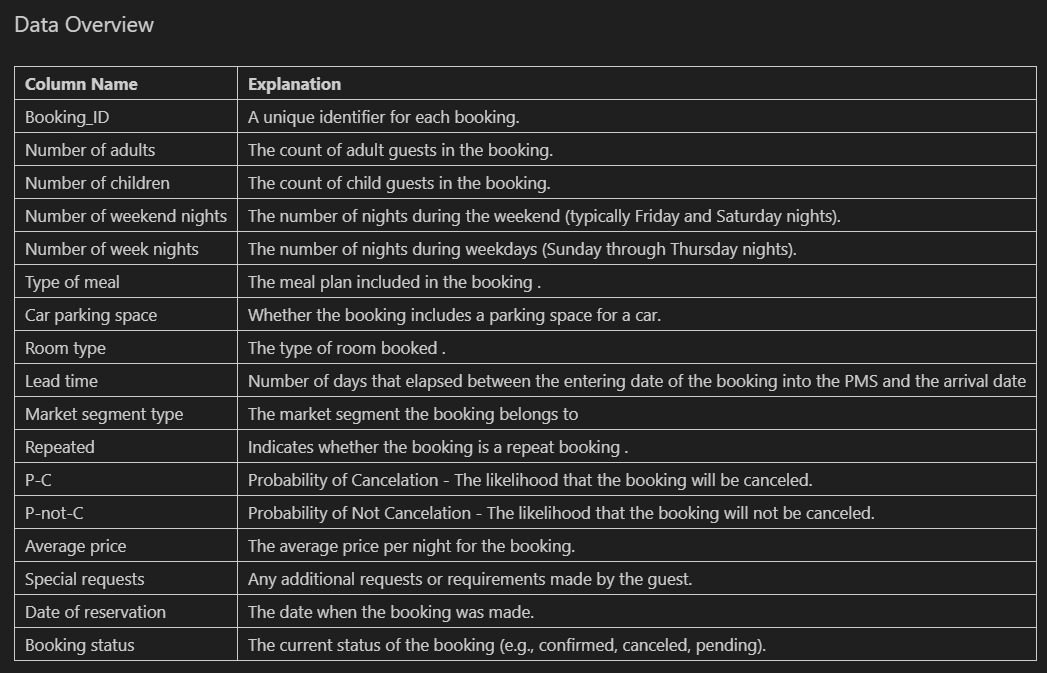

In [132]:
display(Image(filename='../Hotel Reservation Dataset/description.jpg'))

In [133]:
data.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled


In [134]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [135]:
data.rename(columns=lambda x: x.strip(), inplace=True)
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

#### Target Column: Booking status

In [136]:
data['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [137]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [139]:
data.duplicated().sum()

0

In [140]:
# data['P-C'] = data['P-C']*.01
# data['P-not-C'] = data['P-not-C']*.01

In [141]:
try:
    pd.to_datetime(data['date of reservation'])
except:
    print('ERROR: not all formats are the same')

ERROR: not all formats are the same


In [142]:
pd.to_datetime(data['date of reservation'], errors='coerce',
               format='%m/%d/%Y').isnull().sum()/len(data)

0.0010197051123053604

it is tiny percentage of in-cosistant dates format.

In [143]:
# data['date of reservation'] = pd.to_datetime(data['date of reservation'],
#                                              errors='coerce', format='%m/%d/%Y')
# data['resevation_year'] = data['date of reservation'].dt.year
# data['resevation_month'] = data['date of reservation'].dt.month
# data['resevation_day'] = data['date of reservation'].dt.day


# data.drop(columns=['date of reservation'], inplace=True)

In [144]:
data.loc[pd.to_datetime(data['date of reservation'], errors='coerce',
               format='%m/%d/%Y').isnull(),'date of reservation']

2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
18380    2018-2-29
18534    2018-2-29
18680    2018-2-29
19013    2018-2-29
20419    2018-2-29
21674    2018-2-29
21688    2018-2-29
26108    2018-2-29
27559    2018-2-29
27928    2018-2-29
30552    2018-2-29
30616    2018-2-29
30632    2018-2-29
30839    2018-2-29
32041    2018-2-29
34638    2018-2-29
35481    2018-2-29
Name: date of reservation, dtype: object

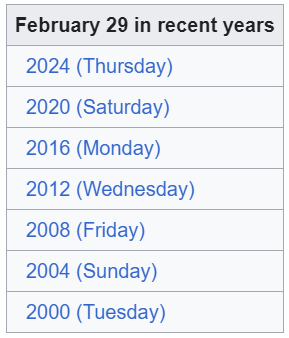

In [145]:
display(Image(filename='./images/feb29.png'))

https://en.wikipedia.org/wiki/February_29

> note: the day of 29 feb didn't came in 2018 which may be human mistake in data entry..
we can put it directly into 1-march-2018

---

### Checking for outlires

#### Outlier Detection Using the IQR Method

We will apply the IQR method to detect outliers specifically for the `lead time` and `average price` columns in our dataset. Checking for outliers in other columns might not be beneficial. For example:

- The `number of adults` column has:
  - Q3 (75th percentile) = 2
  - Q1 (25th percentile) = 2
  - IQR = Q3 - Q1 = 2 - 2 = 0
  - Upper Bound (maxLimit) = Q3 + 1.5 * IQR = 2 + 1.5 * 0 = 2

  This calculation implies that any value above 2 would be considered an outlier, which is unrealistic for determining the number of adults, where values like 3 or 4 should not be outliers.

Therefore, we will focus on detecting and analyzing outliers for the `lead time` and `average price` columns only, where the IQR method is more appropriate and meaningful.

---

In [146]:
def detect_outliers_iqr(col):
    Q1 = np.quantile(col, .25)
    Q3 = np.quantile(col, .75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = col[(col <= lower_bound) | (col >= upper_bound)]

    # Print details
    print("Data points:", col)
    print("Q1 (25th percentile):", Q1)
    print("Q3 (75th percentile):", Q3)
    print("IQR (Interquartile Range):", IQR)
    print("Lower bound for outliers:", lower_bound)
    print("Upper bound for outliers:", upper_bound)
    print("Outliers detected:", outliers)
    print('-'*40, '\n\n')
    return outliers, len(outliers)/len(col)


thedict = {}
for col in ['average price', 'lead time']:
    thedict[col] = detect_outliers_iqr(data[col])

Data points: 0         88.00
1        106.68
2         50.00
3        100.00
4         77.00
          ...  
36280    115.00
36281    107.55
36282    105.61
36283     96.90
36284    133.44
Name: average price, Length: 36285, dtype: float64
Q1 (25th percentile): 80.3
Q3 (75th percentile): 120.0
IQR (Interquartile Range): 39.7
Lower bound for outliers: 20.749999999999993
Upper bound for outliers: 179.55
Outliers detected: 60       258.00
63         0.00
114      184.24
127      190.80
145        0.00
          ...  
36221    207.90
36227    231.00
36250      0.00
36263      1.00
36269    216.00
Name: average price, Length: 1696, dtype: float64
---------------------------------------- 


Data points: 0        224
1          5
2          1
3        211
4         48
        ... 
36280    346
36281     34
36282     83
36283    121
36284     44
Name: lead time, Length: 36285, dtype: int64
Q1 (25th percentile): 17.0
Q3 (75th percentile): 126.0
IQR (Interquartile Range): 109.0
Lower bound for o

In [147]:
thedict

{'average price': (60       258.00
  63         0.00
  114      184.24
  127      190.80
  145        0.00
            ...  
  36221    207.90
  36227    231.00
  36250      0.00
  36263      1.00
  36269    216.00
  Name: average price, Length: 1696, dtype: float64,
  0.046741077580267326),
 'lead time': (5        346
  96       320
  118      443
  120      317
  170      317
          ... 
  36171    315
  36178    386
  36191    304
  36248    292
  36280    346
  Name: lead time, Length: 1332, dtype: int64,
  0.036709384042992975)}

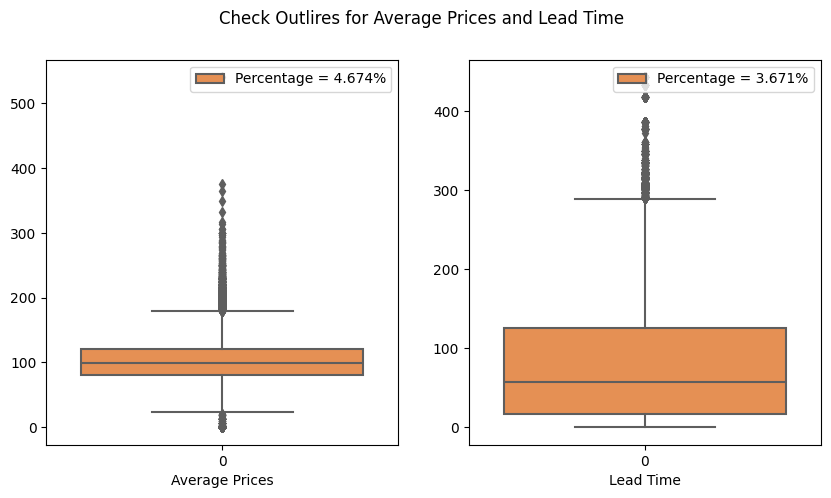

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data['average price'], ax=ax[0], palette='YlOrRd',
            label=f'Percentage = {thedict["average price"][1]*100:.3f}%')
sns.boxplot(data['lead time'], ax=ax[1], palette='YlOrRd',
            label=f'Percentage = {thedict["lead time"][1]*100:.3f}%')


ax[0].set_xlabel('Average Prices')
ax[1].set_xlabel('Lead Time')
ax[0].legend()
ax[1].legend(loc='upper right')

fig.suptitle("Check Outlires for Average Prices and Lead Time")
plt.show()

### Full Pipeline

In [149]:
data.head(1)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,10/2/2015,Not_Canceled


In [150]:
class OptionalScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scale=True):
        self.scale = scale
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        if self.scale:
            self.scaler.fit(X, y)
        return self

    def transform(self, X):
        if self.scale:
            return self.scaler.transform(X)
        return X

class DateFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, date_column):
        self.date_column = date_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.date_column].replace({'2018-2-29':'3/1/2018'},inplace=True)
        X[self.date_column] = pd.to_datetime(X[self.date_column], errors='coerce', format='%m/%d/%Y')
        # Extract year, month, and day
        X['resevation_year'] = X[self.date_column].dt.year
        X['resevation_month'] = X[self.date_column].dt.month
        X['resevation_day'] = X[self.date_column].dt.day
        # Drop the original date column
        X.drop(columns=[self.date_column], inplace=True)
        return X
    
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            lower = (X[col] >= lower_bound) 
            upper = (X[col] <= upper_bound)
            X.loc[~upper,col] = upper_bound
            X.loc[~lower,col] = lower_bound
        return X
    
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', OptionalScaler(scale=False))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

def multiply_by_factor(X, factor=0.01):
    X = X.copy()
    X[['P-C','P-not-C']] = X[['P-C','P-not-C']] * factor
    return X

# Define the transformer function
def transform_multiply_by_factor(X):
    return multiply_by_factor(X)

    
    
preprocessing = ColumnTransformer([
    ('categorical', cat_pipeline, ['type of meal', 'room type', 'market segment type']),
    ('numerical', num_pipeline, ['number of adults','number of children','number of weekend nights','number of week nights','car parking space','lead time','repeated','average price','special requests']),
    ('PC', FunctionTransformer(transform_multiply_by_factor), ['P-C', 'P-not-C']),
    ('date', DateFeatureExtractor(date_column='date of reservation'), ['date of reservation']),
    ('todrop', 'drop', ['Booking_ID'])
                                    ],
verbose_feature_names_out=False, remainder='passthrough')

preprocessing = Pipeline([
    ('column transformer', preprocessing),
    ('outlire removal',OutlierRemover(columns=['average price','lead time'])), 
     ('feature_selection', SelectKBest(score_func=f_classif, k=15)),
])

In [151]:
df = pd.read_csv('../Hotel Reservation Dataset/data.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)

X,y = df.drop(columns=['booking status']), df['booking status']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train).reshape(-1,1)
y_test = label_enc.transform(y_test).reshape(-1,1)

X_train_prepared =  preprocessing.fit_transform(X_train,y_train)
X_test_prepared = preprocessing.transform(X_test)

In [152]:
X_test.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation'],
      dtype='object')

In [153]:
new = pd.DataFrame(columns=['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation'])
new.loc[1,:] = ['INN06040', 1, 0, 2, 4, 'Meal Plan 1', 0, 'Room_Type 1', 69,
       'Online', 0, 0, 0, 120.0, 0, '6/12/2018']
new

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
1,INN06040,1,0,2,4,Meal Plan 1,0,Room_Type 1,69,Online,0,0,0,120.0,0,6/12/2018


In [160]:
model = CatBoostClassifier(random_state=87,n_estimators=1000,
                       verbose=1,learning_rate=.09,max_depth=7)
model.fit(X_train_prepared, y_train)

y_pred_train = model.predict(X_train_prepared)
y_pred_test= model.predict(X_test_prepared)

print('Training Acc:', accuracy_score(y_train,y_pred_train))
print('Test Acc:', accuracy_score(y_test,y_pred_test))

0:	learn: 0.6330618	total: 7.19ms	remaining: 7.18s
1:	learn: 0.5835618	total: 13.7ms	remaining: 6.86s
2:	learn: 0.5459392	total: 20ms	remaining: 6.65s
3:	learn: 0.5126704	total: 26.5ms	remaining: 6.59s
4:	learn: 0.4881111	total: 33ms	remaining: 6.57s
5:	learn: 0.4675409	total: 39.9ms	remaining: 6.61s
6:	learn: 0.4528546	total: 46.6ms	remaining: 6.61s
7:	learn: 0.4402680	total: 53.4ms	remaining: 6.63s
8:	learn: 0.4315266	total: 60.4ms	remaining: 6.65s
9:	learn: 0.4220311	total: 67.2ms	remaining: 6.66s
10:	learn: 0.4147984	total: 73.7ms	remaining: 6.62s
11:	learn: 0.4090373	total: 80.4ms	remaining: 6.62s
12:	learn: 0.4023699	total: 87.4ms	remaining: 6.64s
13:	learn: 0.3975167	total: 94.2ms	remaining: 6.63s
14:	learn: 0.3943080	total: 101ms	remaining: 6.62s
15:	learn: 0.3902638	total: 107ms	remaining: 6.6s
16:	learn: 0.3865194	total: 114ms	remaining: 6.59s
17:	learn: 0.3840990	total: 121ms	remaining: 6.59s
18:	learn: 0.3810946	total: 128ms	remaining: 6.58s
19:	learn: 0.3783708	total: 134m

166:	learn: 0.2901994	total: 1.21s	remaining: 6.03s
167:	learn: 0.2900208	total: 1.22s	remaining: 6.03s
168:	learn: 0.2896935	total: 1.23s	remaining: 6.03s
169:	learn: 0.2895266	total: 1.23s	remaining: 6.02s
170:	learn: 0.2890796	total: 1.24s	remaining: 6.01s
171:	learn: 0.2887630	total: 1.25s	remaining: 6s
172:	learn: 0.2885462	total: 1.25s	remaining: 6s
173:	learn: 0.2883685	total: 1.26s	remaining: 5.99s
174:	learn: 0.2881687	total: 1.27s	remaining: 5.98s
175:	learn: 0.2879521	total: 1.27s	remaining: 5.97s
176:	learn: 0.2876947	total: 1.28s	remaining: 5.97s
177:	learn: 0.2874771	total: 1.29s	remaining: 5.96s
178:	learn: 0.2873367	total: 1.3s	remaining: 5.95s
179:	learn: 0.2871777	total: 1.3s	remaining: 5.94s
180:	learn: 0.2870293	total: 1.31s	remaining: 5.93s
181:	learn: 0.2867179	total: 1.32s	remaining: 5.92s
182:	learn: 0.2863752	total: 1.33s	remaining: 5.92s
183:	learn: 0.2858860	total: 1.33s	remaining: 5.91s
184:	learn: 0.2856169	total: 1.34s	remaining: 5.91s
185:	learn: 0.285291

340:	learn: 0.2547155	total: 2.43s	remaining: 4.69s
341:	learn: 0.2544722	total: 2.43s	remaining: 4.68s
342:	learn: 0.2543251	total: 2.44s	remaining: 4.68s
343:	learn: 0.2542028	total: 2.45s	remaining: 4.67s
344:	learn: 0.2540197	total: 2.46s	remaining: 4.66s
345:	learn: 0.2539173	total: 2.46s	remaining: 4.66s
346:	learn: 0.2537781	total: 2.47s	remaining: 4.65s
347:	learn: 0.2535854	total: 2.48s	remaining: 4.64s
348:	learn: 0.2533243	total: 2.48s	remaining: 4.63s
349:	learn: 0.2531638	total: 2.49s	remaining: 4.63s
350:	learn: 0.2528530	total: 2.5s	remaining: 4.62s
351:	learn: 0.2527353	total: 2.51s	remaining: 4.62s
352:	learn: 0.2525877	total: 2.52s	remaining: 4.61s
353:	learn: 0.2524909	total: 2.52s	remaining: 4.6s
354:	learn: 0.2523034	total: 2.53s	remaining: 4.59s
355:	learn: 0.2521407	total: 2.54s	remaining: 4.59s
356:	learn: 0.2519687	total: 2.54s	remaining: 4.58s
357:	learn: 0.2517753	total: 2.55s	remaining: 4.58s
358:	learn: 0.2516671	total: 2.56s	remaining: 4.57s
359:	learn: 0.

510:	learn: 0.2313257	total: 3.66s	remaining: 3.5s
511:	learn: 0.2312330	total: 3.66s	remaining: 3.49s
512:	learn: 0.2310997	total: 3.67s	remaining: 3.48s
513:	learn: 0.2309977	total: 3.68s	remaining: 3.48s
514:	learn: 0.2309546	total: 3.68s	remaining: 3.47s
515:	learn: 0.2307973	total: 3.69s	remaining: 3.46s
516:	learn: 0.2306553	total: 3.7s	remaining: 3.45s
517:	learn: 0.2304894	total: 3.7s	remaining: 3.45s
518:	learn: 0.2303619	total: 3.71s	remaining: 3.44s
519:	learn: 0.2302162	total: 3.72s	remaining: 3.43s
520:	learn: 0.2300854	total: 3.72s	remaining: 3.42s
521:	learn: 0.2299626	total: 3.73s	remaining: 3.42s
522:	learn: 0.2297979	total: 3.74s	remaining: 3.41s
523:	learn: 0.2297950	total: 3.74s	remaining: 3.4s
524:	learn: 0.2297324	total: 3.75s	remaining: 3.39s
525:	learn: 0.2296810	total: 3.76s	remaining: 3.38s
526:	learn: 0.2295862	total: 3.76s	remaining: 3.38s
527:	learn: 0.2295364	total: 3.77s	remaining: 3.37s
528:	learn: 0.2293543	total: 3.78s	remaining: 3.36s
529:	learn: 0.22

683:	learn: 0.2134734	total: 4.87s	remaining: 2.25s
684:	learn: 0.2133306	total: 4.88s	remaining: 2.24s
685:	learn: 0.2132154	total: 4.88s	remaining: 2.23s
686:	learn: 0.2131057	total: 4.89s	remaining: 2.23s
687:	learn: 0.2130378	total: 4.9s	remaining: 2.22s
688:	learn: 0.2128972	total: 4.91s	remaining: 2.22s
689:	learn: 0.2127380	total: 4.92s	remaining: 2.21s
690:	learn: 0.2126361	total: 4.92s	remaining: 2.2s
691:	learn: 0.2125333	total: 4.93s	remaining: 2.19s
692:	learn: 0.2124443	total: 4.94s	remaining: 2.19s
693:	learn: 0.2123305	total: 4.95s	remaining: 2.18s
694:	learn: 0.2122576	total: 4.95s	remaining: 2.17s
695:	learn: 0.2121611	total: 4.96s	remaining: 2.17s
696:	learn: 0.2120826	total: 4.97s	remaining: 2.16s
697:	learn: 0.2120157	total: 4.97s	remaining: 2.15s
698:	learn: 0.2119000	total: 4.98s	remaining: 2.15s
699:	learn: 0.2118123	total: 4.99s	remaining: 2.14s
700:	learn: 0.2116611	total: 5s	remaining: 2.13s
701:	learn: 0.2115596	total: 5s	remaining: 2.12s
702:	learn: 0.211461

858:	learn: 0.1986722	total: 6.09s	remaining: 999ms
859:	learn: 0.1985984	total: 6.09s	remaining: 992ms
860:	learn: 0.1985250	total: 6.1s	remaining: 985ms
861:	learn: 0.1984434	total: 6.11s	remaining: 978ms
862:	learn: 0.1982761	total: 6.12s	remaining: 971ms
863:	learn: 0.1982215	total: 6.12s	remaining: 964ms
864:	learn: 0.1981977	total: 6.13s	remaining: 957ms
865:	learn: 0.1981400	total: 6.14s	remaining: 950ms
866:	learn: 0.1980838	total: 6.14s	remaining: 942ms
867:	learn: 0.1980340	total: 6.15s	remaining: 935ms
868:	learn: 0.1979670	total: 6.16s	remaining: 928ms
869:	learn: 0.1979063	total: 6.16s	remaining: 921ms
870:	learn: 0.1978281	total: 6.17s	remaining: 914ms
871:	learn: 0.1977276	total: 6.18s	remaining: 907ms
872:	learn: 0.1977120	total: 6.18s	remaining: 900ms
873:	learn: 0.1976546	total: 6.19s	remaining: 893ms
874:	learn: 0.1975607	total: 6.2s	remaining: 885ms
875:	learn: 0.1974611	total: 6.21s	remaining: 878ms
876:	learn: 0.1973654	total: 6.21s	remaining: 871ms
877:	learn: 0.

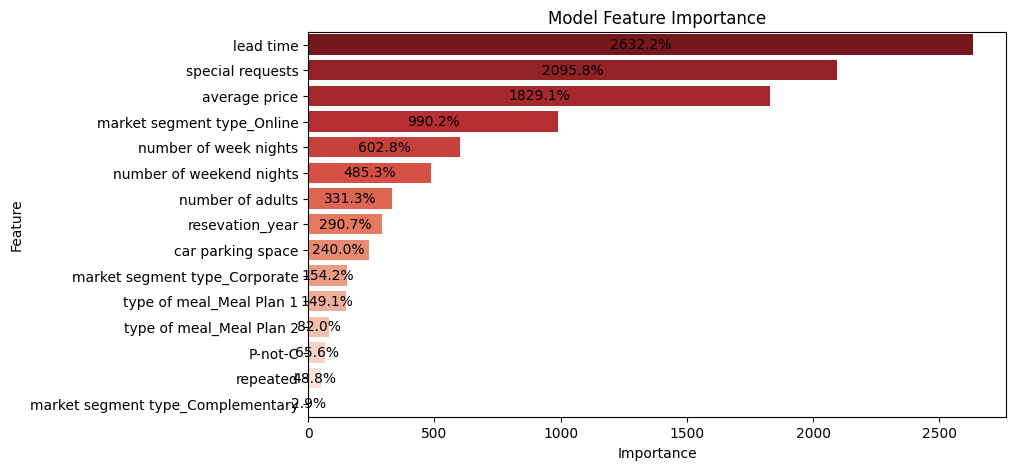

In [158]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_prepared.columns,
                                      'Importance': feature_importances}).sort_values(by='Importance',
                                                                                      ascending=False)
plt.figure(figsize=(9, 5))
a = sns.barplot(y=feature_importance_df['Feature'][:18], x=feature_importance_df['Importance'][:18]*100,palette='Reds_r')
heights = [str(round(height ,1))+'%' for height in a.containers[0].datavalues]
a.bar_label(a.containers[0], labels=heights, label_type='center')
plt.title('Model Feature Importance')
plt.show()

In [159]:
from joblib import dump, load

pipeline = Pipeline([
    ('preprocessor', preprocessing),  
])


dump(pipeline, 'pipeline.joblib')
dump(model, 'model.joblib')

['model.joblib']

In [ ]:
(model.predict(pipeline.transform(X_test))==1).mean()

- original score: Training Acc: 0.994074686509577 Test Acc: 0.9034036103072896
- using outlire clibbing:  Training Acc: 0.994074686509577 Test Acc: 0.9024390243902439
- stratifing with y 87rs: Training Acc: 0.9942123705657703 Test Acc: 0.905750505236083

- grid search Best parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test set accuracy: 0.9034036103072896

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 6,9,12,7],
    'min_samples_split': [2, 5,4],
    'min_samples_leaf': [2,3]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_prepared, y_train)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test_prepared)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

In [ ]:
model = CatBoostClassifier(learning_rate=0.1, iterations=300, depth=6, loss_function='Logloss')

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [4, 6, 8, 10],
    'iterations': [600,1000],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'thread_count': [2, 4, 8]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_prepared, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

y_pred = random_search.predict(X_test_prepared)
print("Classification report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
